## Exercise 18: Implement an oracle with multiple solutions
1. Design an oracle that marks two target states (e.g., |101⟩ and |110⟩) as solutions.
2. Implement Grover’s algorithm to find one of these solutions.

Expected Outcome: You will see probabilities for both |101⟩ and |110⟩.

[Hints:] Apply X gates to mark multiple states, then apply the Toffoli gate to flip their signs. You might need to adjust the diffusion operator for multiple solutions.

In [1]:
from qiskit import *
from qiskit.primitives import StatevectorSampler  
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector
from numpy import sqrt
import numpy as np
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from qiskit_aer import AerSimulator
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

In [2]:
target_states = ['101', '010']

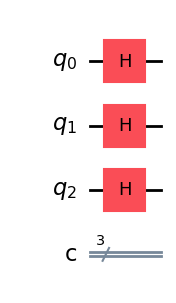

In [3]:
qc = QuantumCircuit(3, 3) 
    
qc.h(range(3))

qc.draw('mpl')

Initial State Vector (in LaTeX notation): 


<IPython.core.display.Latex object>


Initial State Vector (on Q-sphere Sphere):


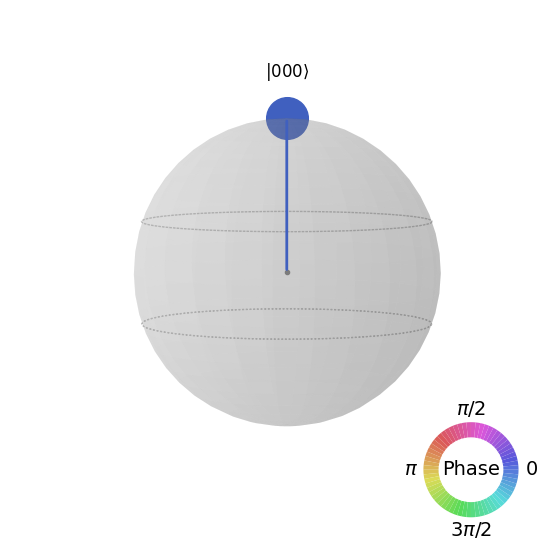


Initial State Vector (on Bloch Sphere):  


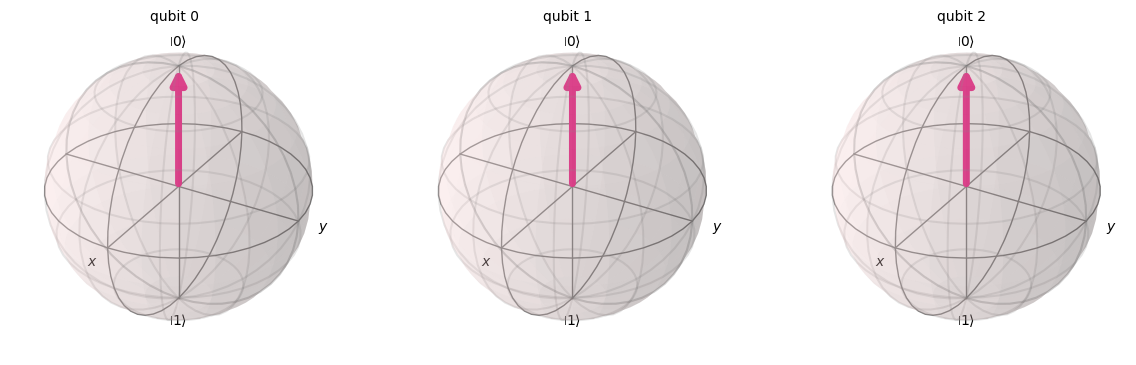

In [4]:
u_init = Statevector.from_label('000')
print("\033[1mInitial State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_init.draw('latex'))

print("\n\033[1mInitial State Vector (on Q-sphere Sphere):\033[0m".ljust(50))
display(u_init.draw('qsphere'))

print("\n\033[1mInitial State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_init.draw('bloch'))


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


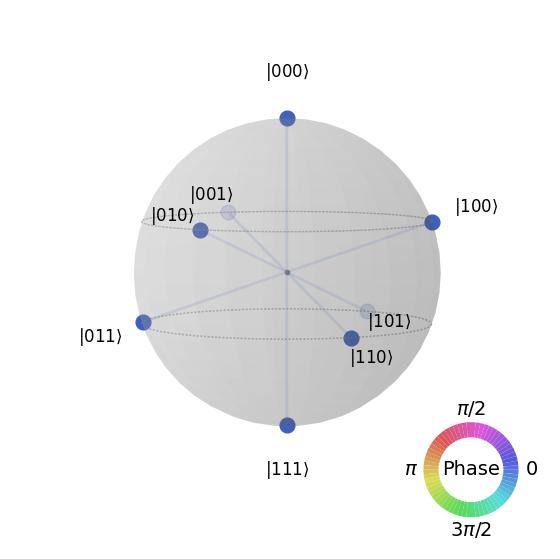


Resulting State Vector (on Bloch Sphere):


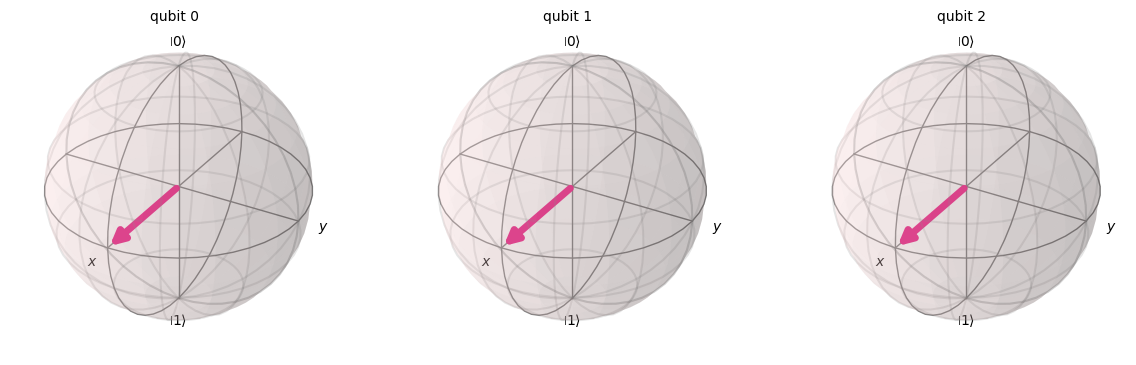

In [5]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

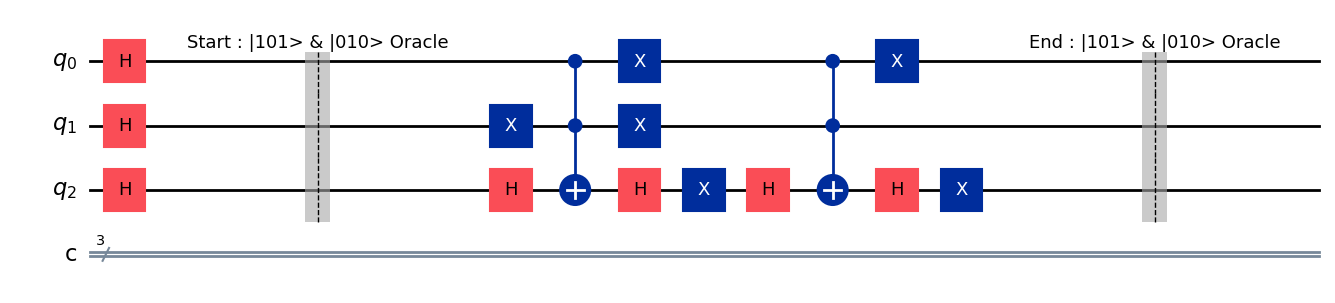

In [6]:
qc.barrier(label="Start : |101> & |010> Oracle")  # Label for the Oracle part

def apply_oracle_for_targets(qc, target_states):
    for target_state in target_states:
        flip_qubits = [i for i, bit in enumerate(target_state) if bit == '0']
        # Flip necessary qubits
        for qubit in flip_qubits:
            qc.x(qubit)
        
        # Apply controlled-Z to mark the state
        qc.h(2)
        qc.mcx(list(range(2)), 2)  # Multi-controlled-X
        qc.h(2)
        
        # Restore flipped qubits
        for qubit in flip_qubits:
            qc.x(qubit)
#%%
# Apply the oracle for both target states
apply_oracle_for_targets(qc, target_states)
# Label the end of the oracle
qc.barrier(label="End : |101> & |010> Oracle") # Label for end of Oracle
qc.draw('mpl')


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


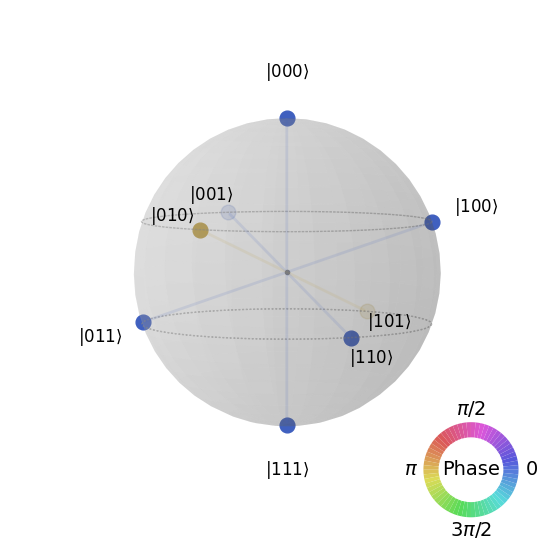


Resulting State Vector (on Bloch Sphere):


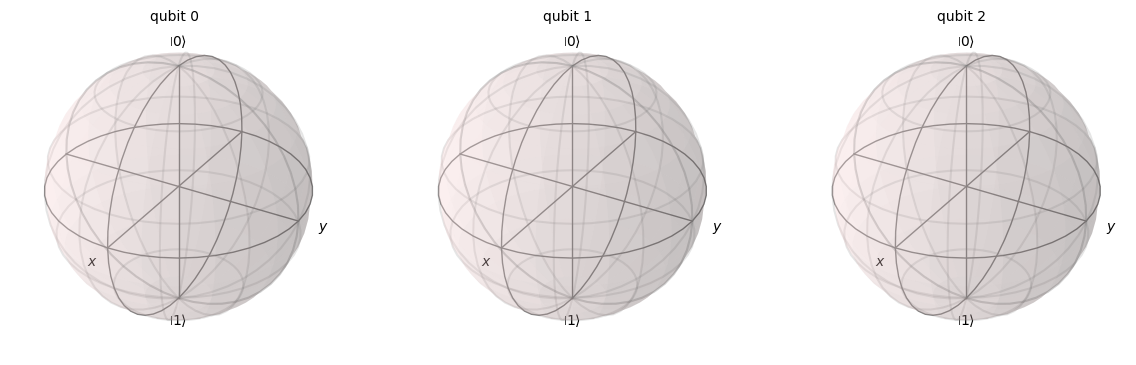

In [7]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

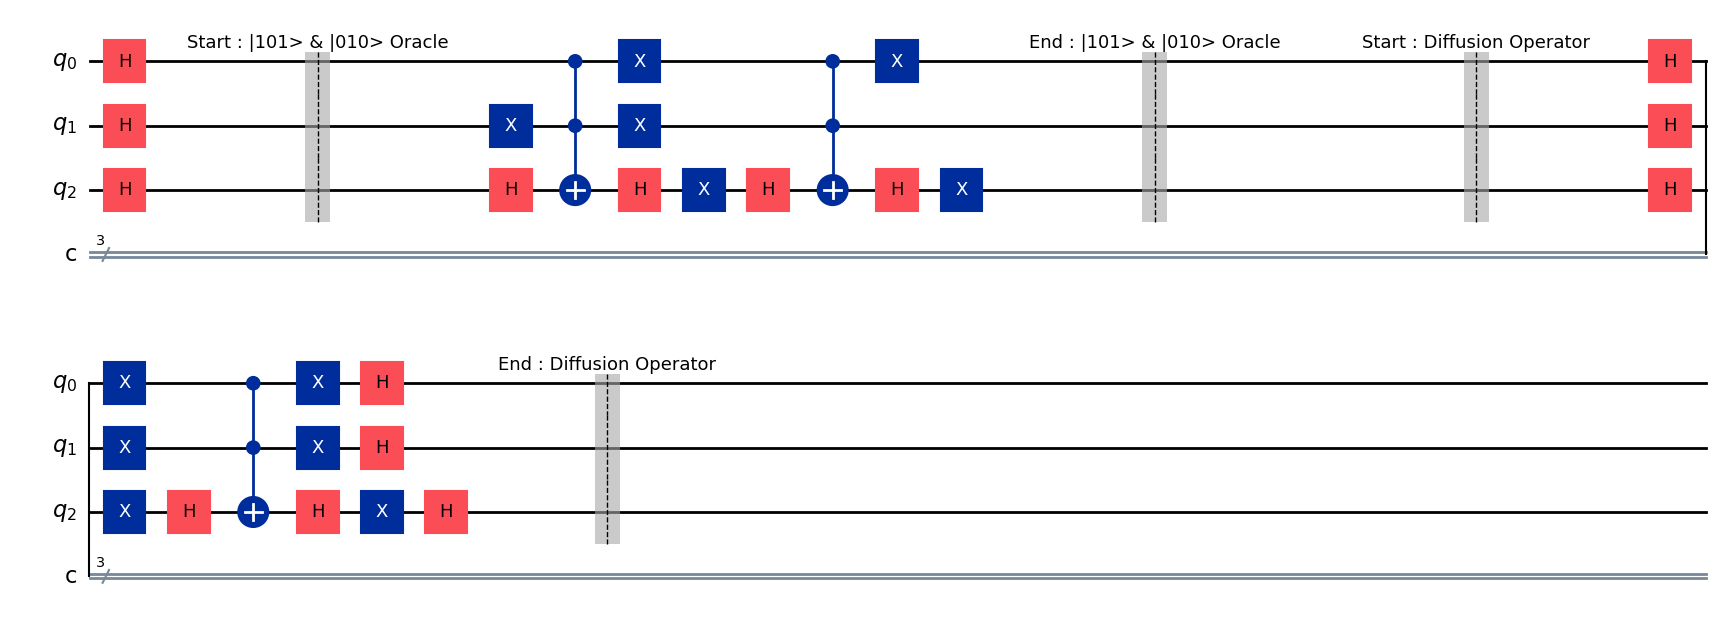

In [8]:
qc.barrier(label="Start : Diffusion Operator")
# Step 3: Implement diffusion operator
# Hadamard gates
for qubit in range(3):
    qc.h(qubit)

# Flip about zero state
for qubit in range(3):
    qc.x(qubit)

# Apply controlled-Z
qc.h(2)
qc.mcx(list(range(2)), 2)
qc.h(2)

# Restore qubits
for qubit in range(3):
    qc.x(qubit)

# Final Hadamard gates
for qubit in range(3):
    qc.h(qubit)
qc.barrier(label="End : Diffusion Operator")

qc.draw('mpl')


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


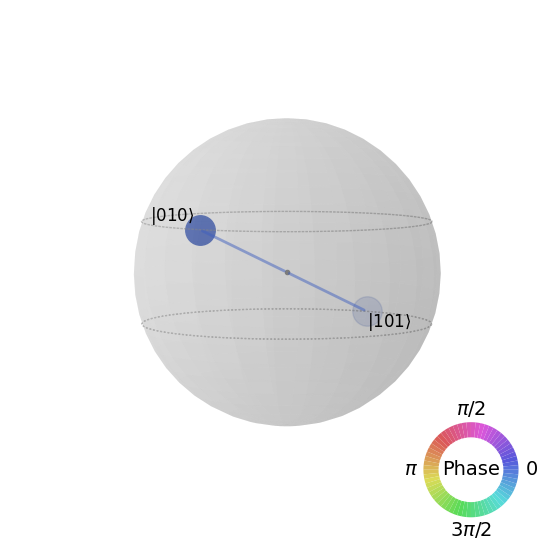


Resulting State Vector (on Bloch Sphere):


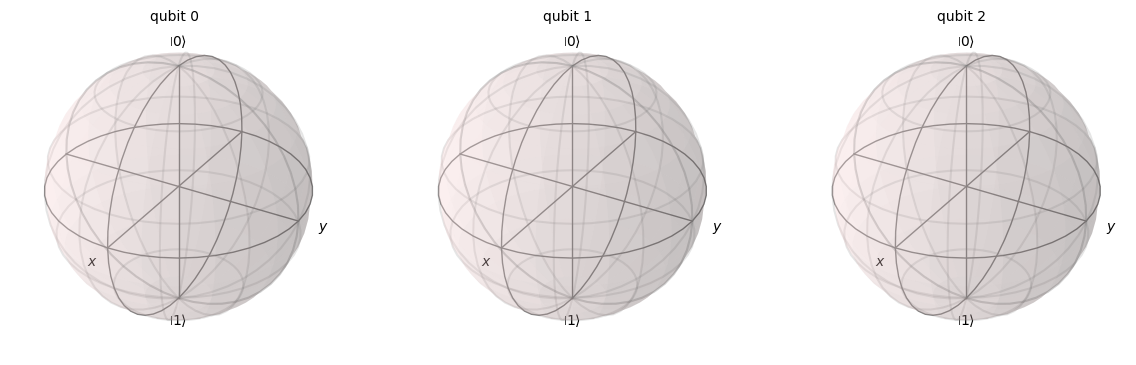

In [9]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

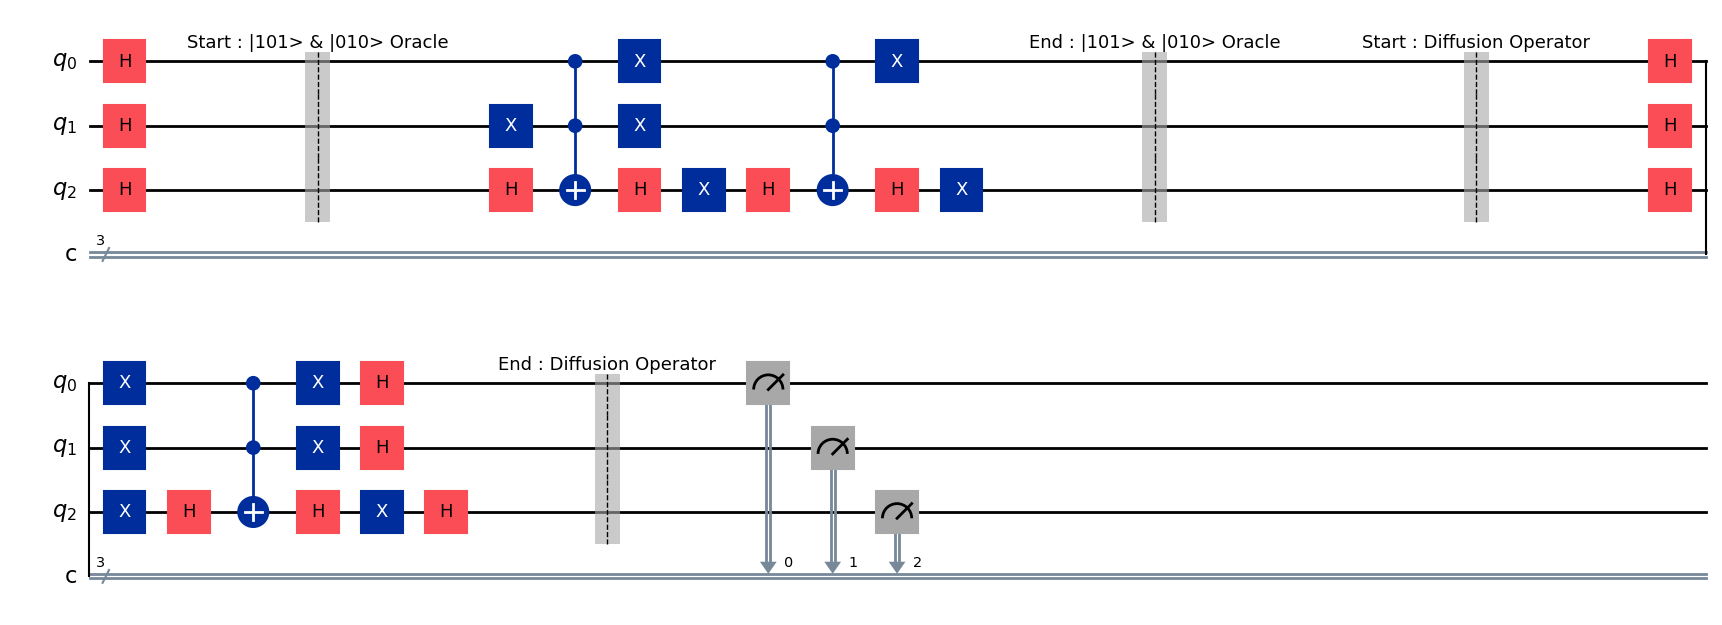

In [10]:
qc.measure(range(3), range(3))

qc.draw('mpl')

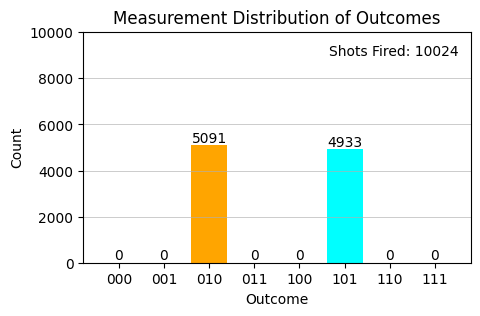

In [13]:
shots = 10024
result = AerSimulator().run(qc, shots=shots, memory=True).result()
counts = result.get_counts()
possible_outcomes = ['000', '001', '010', '011', '100', '101', '110', '111']
counts = {outcome: counts.get(outcome, 0) for outcome in possible_outcomes}

categories = list(counts.keys())
values = list(counts.values())

fig, axs = plt.subplots(1, 1, figsize=(5, 3))

bars0 = axs.bar(categories, values, color=['orange', 'cyan'])
axs.set_xlabel('Outcome')
axs.set_ylabel('Count')
axs.set_title('Measurement Distribution of Outcomes')
axs.grid(True,  axis='y', linestyle='-', linewidth=0.5, alpha=0.9)
axs.set_ylim(0, shots)
for bar in bars0:
    yval = bar.get_height()
    axs.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

custom_legend = [
    mpatches.Patch(color='none', label=f'Shots Fired: {shots}')
]
axs.legend(handles=custom_legend, frameon=False)